In [1]:
!pip3 install xgboost
import xgboost

In [134]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [101]:
test_data=pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [102]:
train_data=pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [103]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [104]:
test_data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [105]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [106]:
#Information from the test_data and train_data, we see that there are some of missing values at DataFrame columns .

In [107]:
#Now lets get names of columns which are have missing values for test_data and train_data

Columns with missing (NA) values:
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


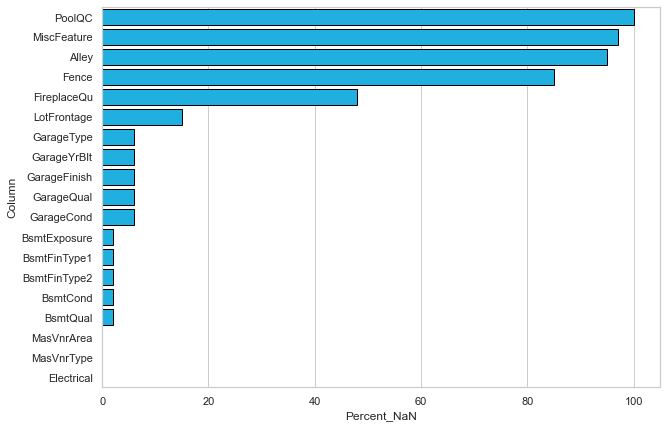

In [108]:
test_data_missing = [col for col in test_data.columns
                     if test_data[col].isnull().any()]

print("Columns with missing (NA) values:")
print(test_data_missing)

# Count how many NA values are in each of those columns
test_data_nan_count = list(map(lambda col: round(test_data[col].isna().sum()*100/len(test_data)), test_data_missing))


table = pd.DataFrame(test_data_missing, columns=["Column"])
table["Percent_NaN"] = test_data_nan_count
table.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=table,
                edgecolor="black", color="deepskyblue")

Columns with missing (NA) values:
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


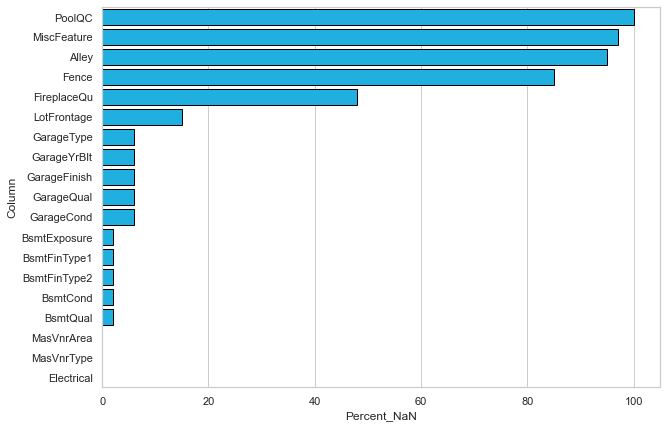

In [109]:
train_data_missing = [col for col in train_data.columns
                     if train_data[col].isnull().any()]

print("Columns with missing (NA) values:")
print(train_data_missing)

# Count how many NA values are in each of those columns
train_data_nan_count = list(map(lambda col: round(train_data[col].isna().sum()*100/len(train_data)), train_data_missing))


table_tn = pd.DataFrame(test_data_missing, columns=["Column"])
table_tn["Percent_NaN"] = test_data_nan_count
table_tn.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=table,
                edgecolor="black", color="deepskyblue")

In [110]:
#From the test_data graph we see that there are 16 columns with missing values. PoolQC having 100%,
#MiscFeature having 96%, Alley having 93%, Fence having 86%, FireplaceQu having 48%, LotFrontage having 16%, 
#GarageType having 7%, GarageYrBit having 7%, GarageFinish having 7%, GarageQual having 7%, GarageCond having 7%, 
#BsmtExposure having 3%, BsmtFinType1 having 3%,BsmtFinType2 having 3%, BsmtCond having 3% and BsmtQual having 3 % missing 
#values 

#From the train_data graph we see that there are 16 columns with missing values. PoolQC having 100%,
#MiscFeature having 96%, Alley having 93%, Fence having 86%, FireplaceQu having 48%, LotFrontage having 16%, 
#GarageType having 7%, GarageYrBit having 7%, GarageFinish having 7%, GarageQual having 7%, GarageCond having 7%, 
#BsmtExposure having 3%, BsmtFinType1 having 3%,BsmtFinType2 having 3%, BsmtCond having 3% and BsmtQual having 3 % missing 
#values 

#As we seen there are some columns have high rate missing values which are, if we replace them it has not effect the 
#prediction. If we take this rate above 30%, we must impute 'PoolQC', 'MiscFeature', 'Alley', 'Fence' and 'FireplaceQu' 
#columns

#The missing values from these columns will be imputed where they will be 
#replaced with the median value from each column (which is sensible given that one of the columns is "GarageYrBlt" where 
#the values are strictly discrete, plus they're less affected by outliers).

In [111]:
test_data.drop(["PoolQC","Fence", "FireplaceQu"], axis=1, inplace=True)

In [112]:
train_data.drop(["PoolQC","Fence", "FireplaceQu"], axis=1, inplace=True)

In [113]:
string_features=[]
for col in train_data.columns:
    if(np.dtype(train_data[col]) ==  'object'):
        string_features.append(col)

In [114]:
string_features_2=[]
for col in test_data.columns:
    if(np.dtype(test_data[col]) ==  'object'):
        string_features_2.append(col)

In [115]:
print(len(string_features) )
print('####################')
print(list(string_features))

40
####################
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [116]:
print(len(string_features_2) )
print("*********************")
print(list(string_features_2))

40
*********************
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [117]:
label_model =LabelEncoder() 
for col in string_features : 
    train_data[col]=label_model.fit_transform(train_data[col])

In [118]:
for col in string_features_2 : 
    test_data[col]=label_model.fit_transform(test_data[col])

In [119]:
test_data.fillna(value=test_data['LotFrontage'].mean(), inplace=True)
test_data.fillna(value=test_data['GarageType'].mean(), inplace=True)
test_data.fillna(value=test_data['GarageFinish'].mean(), inplace=True)
test_data.fillna(value=test_data['GarageQual'].mean(), inplace=True)
test_data.fillna(value=test_data['GarageCond'].mean(), inplace=True)
test_data.fillna(value=test_data['BsmtExposure'].mean(), inplace=True)
test_data.fillna(value=test_data['BsmtFinType1'].mean(), inplace=True)
test_data.fillna(value=test_data['BsmtFinType2'].mean(), inplace=True)
test_data.fillna(value=test_data['BsmtCond'].mean(), inplace=True)
test_data.fillna(value=test_data['BsmtQual'].mean(), inplace=True)



<AxesSubplot:>

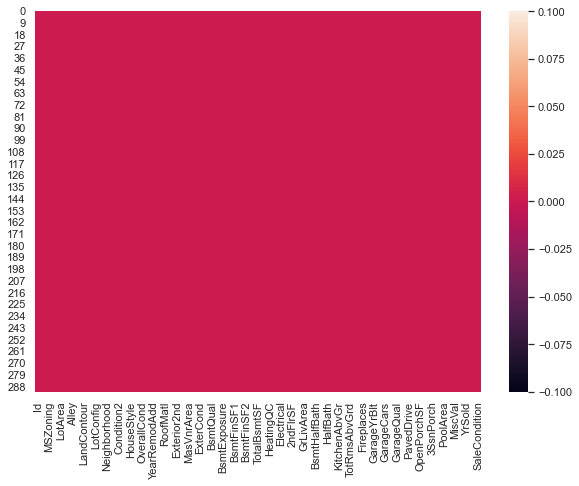

In [120]:
sns.heatmap(test_data.isnull())

In [121]:
train_data.fillna(value=train_data['LotFrontage'].mean(), inplace=True)
train_data.fillna(value=train_data['GarageType'].mean(), inplace=True)
train_data.fillna(value=train_data['GarageFinish'].mean(), inplace=True)
train_data.fillna(value=train_data['GarageQual'].mean(), inplace=True)
train_data.fillna(value=train_data['GarageCond'].mean(), inplace=True)
train_data.fillna(value=train_data['BsmtExposure'].mean(), inplace=True)
train_data.fillna(value=train_data['BsmtFinType1'].mean(), inplace=True)
train_data.fillna(value=train_data['BsmtFinType2'].mean(), inplace=True)
train_data.fillna(value=train_data['BsmtCond'].mean(), inplace=True)
train_data.fillna(value=train_data['BsmtQual'].mean(), inplace=True)

<AxesSubplot:>

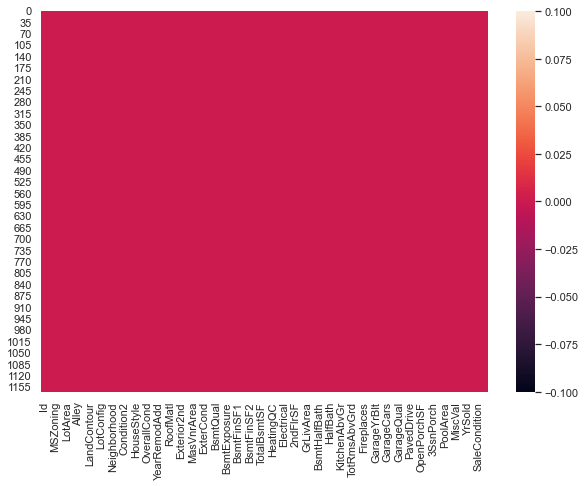

In [122]:
sns.heatmap(train_data.isnull())

In [123]:
#We will now produce a correlation heatmap showing the correlation  each numerical feature with "SalePrice". Any variables 
#that have a low correlation with "SalePrice" is likely not to have a huge impact on the final sale price of the house, any 
#variables with correlation less than |0.3| will be replaced by 0.

<AxesSubplot:>

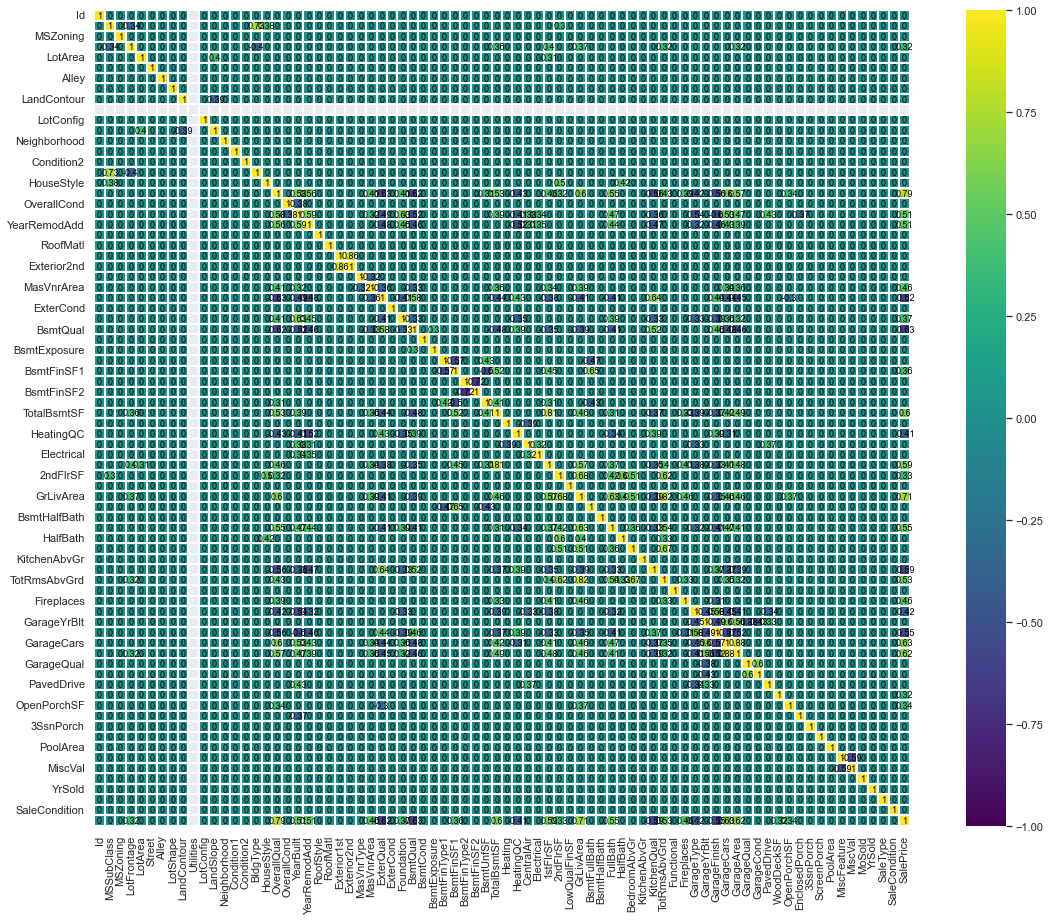

In [124]:
corr_matrix = train_data.corr()
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
cmap = "viridis"
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [125]:
#10 strongly correlated values with SalePrice:
#OverallQual    0.79
#GrLivArea      0.71
#GarageCars     0.63
#GarageArea     0.62
#TotalBsmtSF    0.60
#1stFlrSF       0.59
#FullBath       0.55
#TotRmsAbvGrd   0.53
#YearBuilt      0.51
#YearRemodAdd   0.51

#8 slightly correlated values with SalePrice:
#MasVnrArea    0.46
#Fireplaces    0.46
#BsmtFinSF1    0.36
#WoodDeckSF    0.32
#2ndFlrSF      0.33
#OpenPorchSF   0.34

In [126]:
x = train_data.iloc[:,1:].values
y = train_data.iloc[:,0].values

In [127]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [129]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)


In [132]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)

In [135]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)

In [137]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
#print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  100
Decision tree  Regression Model Score is  100


,Model,Score
0,Multiple Linear Regression,1.000000
2,Random forest Regression,0.999973
1,Decision Tree,0.999868
